In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
%matplotlib inline

##### STEP 1: Read in all the data

In [2]:
workBook = pd.ExcelFile('C:\Users\clockwork\Downloads\Module6_Assignment_DataSet.xlsx')

firstParse = True
for sheetCounter in range(0, len(workBook.sheet_names)):
    nextSheet = workBook.sheet_names[sheetCounter]
    df = workBook.parse(nextSheet)
    df.columns = ['Y', 'X']
    df['SET_ID'] = nextSheet
    if(firstParse == True):
        allData = df
        firstParse = False
    else:
        allData = allData.append(df, ignore_index = True);

# Check if data was read in correctly
print allData.groupby(['SET_ID']).count()

          Y    X
SET_ID          
Set 1   100  100
Set 2   100  100
Set 3   100  100
Set 4   100  100
Set 5   101  101
Set 6   101  101


##### STEP 2: Explore the data

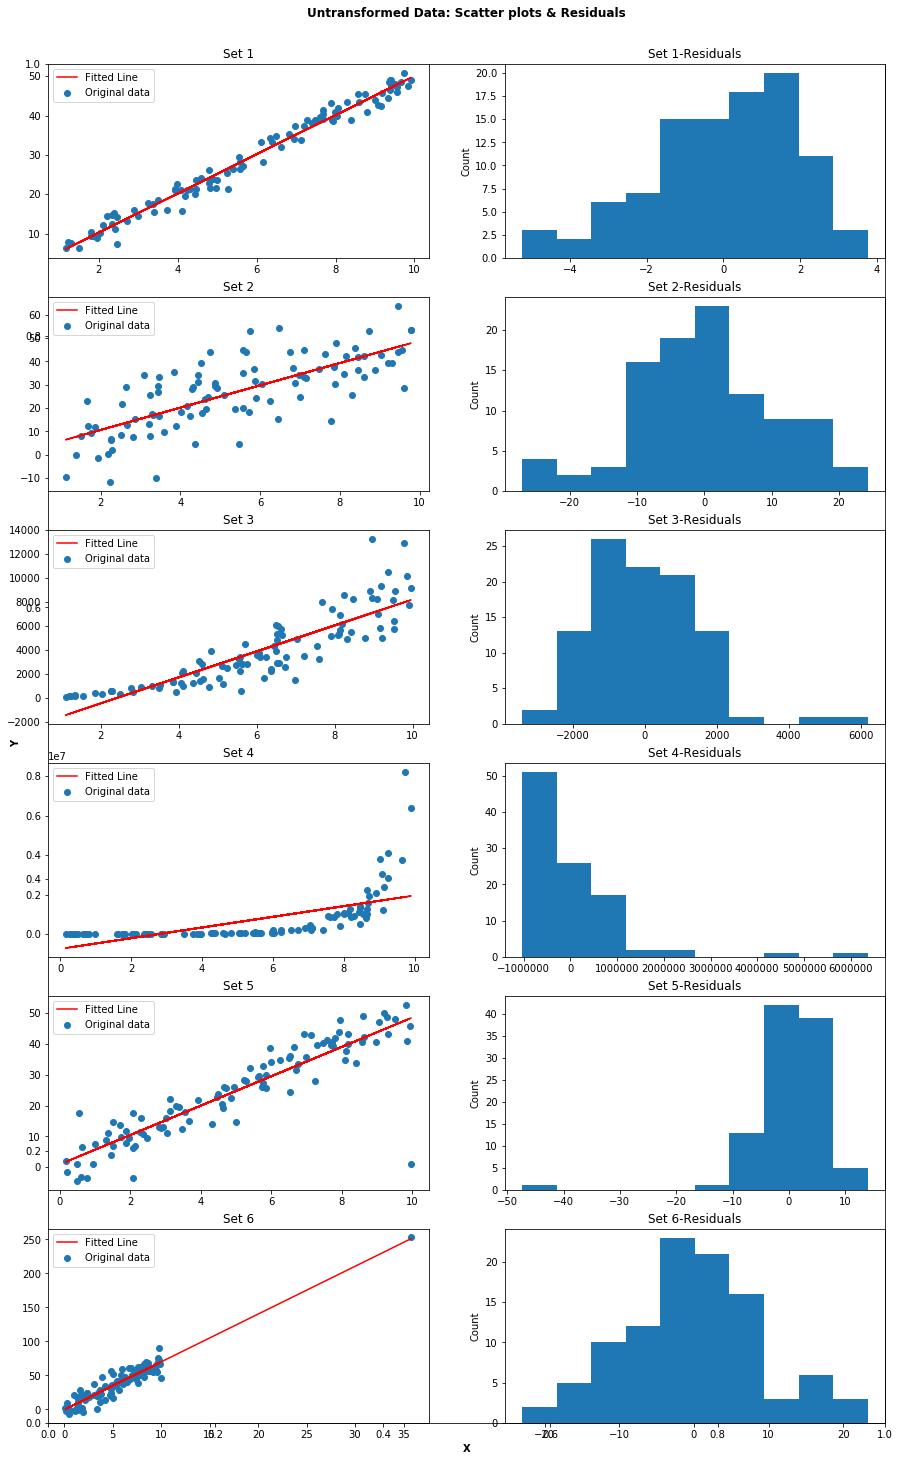

In [22]:
# Make scatter plots for each set to see if any obvious correlation is apparent from visual inspection
fig = plt.figure(figsize=(15,25))
plt.title('Untransformed Data: Scatter plots & Residuals', fontdict=dict(weight='bold'), y=1.03)
plt.xlabel('X', fontdict=dict(weight='bold'))
plt.ylabel('Y', fontdict=dict(weight='bold'))

# Let's make a 2x3 plot: one for each set of data
setIds = allData.SET_ID.unique()
plotId = 1

olsResults_RawData = {}
for setCounter in range(0, len(setIds)):
    #First plot the data and the fitted line
    ax = fig.add_subplot(6, 2, plotId)
    ax.set_title(setIds[setCounter])
    ax.scatter(allData[allData.SET_ID == setIds[setCounter]].X, allData[allData.SET_ID == setIds[setCounter]].Y, label='Original data')
    #Also add a Regression line with intercept
    olsModel = sm.ols(formula='Y ~ X', data=allData[allData.SET_ID == setIds[setCounter]]).fit()
    intercept, slope = olsModel.params
    olsResults_RawData[setIds[setCounter]] = olsModel
    ax.plot(allData[allData.SET_ID == setIds[setCounter]].X, intercept + slope * allData[allData.SET_ID == setIds[setCounter]].X , 'r-', label='Fitted Line')
    ax.legend()
    plotId = plotId + 1
    #Then plot the residuals
    ax = fig.add_subplot(6, 2, plotId)
    ax.hist(olsModel.resid)
    ax.set_title(setIds[setCounter]+ '-Residuals')
    ax.set_ylabel('Count')
    plotId = plotId + 1

plt.show()

__Interpretation of OLS Results for Untransformed Data:__<br/>
It would seem from visually inspecting the six plots and their respective regression lines that a linear model __is suitable__ for the following data sets:<br/>
-  Set 1
-  Set 2
-  Set 5
-  Set 6

The majority of points appear to be distributed about the fitted line and the residuals appear to be distributed about zero.

It would seem from visually inspecting the six plots and their respective regression lines that a linear model __is unsuitable__ for the following data sets:
-  Set 3
-  Set 4

For these two sets, there appears to be a curvature in the distribution of the dependent variable.

##### STEP 3: transform the data in various ways to examine if this will enable a linear fit for Sets 2 and 4

In [7]:
# Add Log(X) and Log(Y)
allData['LOG_Y'] = np.log(allData['Y'])
allData['LOG_X'] = np.log(allData['X'])
# Add Exp(X) and Exp(Y)
allData['EXP_Y'] = np.exp(allData['Y'])
allData['EXP_X'] = np.exp(allData['X'])
# Add SQR(X) and SQR(Y)
allData['SQR_Y'] = np.square(allData['Y'])
allData['SQR_X'] = np.square(allData['X'])
# Add SQRT(X) and SQRT(Y)
allData['SQRT_Y'] = np.sqrt(allData['Y'])
allData['SQRT_X'] = np.sqrt(allData['X'])

C:\Users\clockwork\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\clockwork\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\clockwork\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


##### STEP 4: for Sets 3 and 4, make scatter plots for the transformed Y-values

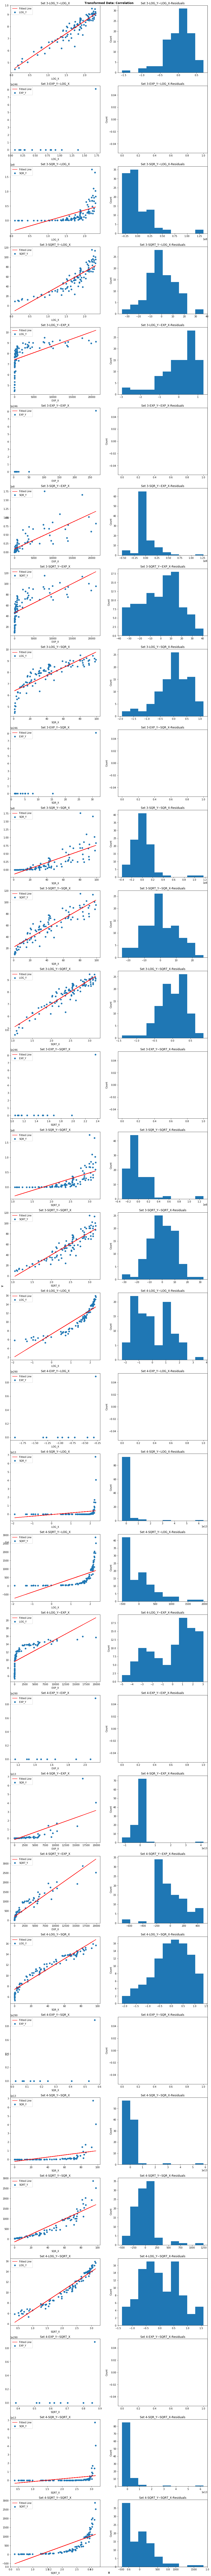

In [35]:
# Let's make a 4x2 plot: one column for each set of data
setIds = ['Set 3', 'Set 4']
dependentColList = ['LOG_Y', 'EXP_Y', 'SQR_Y', 'SQRT_Y']
explanatoryColList = ['LOG_X', 'EXP_X', 'SQR_X', 'SQRT_X']
plotId = 1

fig = plt.figure(figsize=(15,200))
plt.title('Transformed Data: Correlation', fontdict=dict(weight='bold'))
plt.xlabel('X', fontdict=dict(weight='bold'))
plt.ylabel('Y', fontdict=dict(weight='bold'))

olsResults_TransformedData = {}
for setCounter in range(0, len(setIds)):
    for explanatoryColCounter in range(0, len(explanatoryColList)):
        for dependentColCounter in range(0, len(dependentColList)):
            ax = fig.add_subplot(32, 2, plotId)
            ax.set_title(setIds[setCounter] + '-' + dependentColList[dependentColCounter] + '~' + explanatoryColList[explanatoryColCounter])
            ax.scatter(allData[allData.SET_ID == setIds[setCounter]][explanatoryColList[explanatoryColCounter]], 
                       allData[allData.SET_ID == setIds[setCounter]][dependentColList[dependentColCounter]], 
                       label=dependentColList[dependentColCounter])
            ax.set_xlabel(explanatoryColList[explanatoryColCounter])
            #Also add a Regression line with intercept
            regressionFormula = dependentColList[dependentColCounter] + ' ~ ' + explanatoryColList[explanatoryColCounter]
            olsModel = sm.ols(formula=regressionFormula, data=allData[allData.SET_ID == setIds[setCounter]], missing='drop').fit()
            intercept, slope = olsModel.params
            olsResults_TransformedData[setIds[setCounter] + '-' 
                                       + dependentColList[dependentColCounter] 
                                       + '~' 
                                       + explanatoryColList[explanatoryColCounter]] = olsModel
            ax.plot(allData[allData.SET_ID == setIds[setCounter]][explanatoryColList[explanatoryColCounter]], 
                    intercept + slope * allData[allData.SET_ID == setIds[setCounter]][explanatoryColList[explanatoryColCounter]], 
                    'r-', label='Fitted Line')
            ax.legend()
            plotId = plotId + 1;
            #Now also plot the residuals
            ax = fig.add_subplot(32, 2, plotId)
            ax.hist(olsModel.resid.dropna())
            ax.set_title(setIds[setCounter] + '-' + dependentColList[dependentColCounter] + '~' + explanatoryColList[explanatoryColCounter]+ '-Residuals')
            ax.set_ylabel('Count')
            plotId = plotId + 1

plt.show()

In [34]:
for key in sorted(olsResults_TransformedData):
    print key + ": " + str(olsResults_TransformedData[key].rsquared)

Set 3-EXP_Y~EXP_X: nan
Set 3-EXP_Y~LOG_X: nan
Set 3-EXP_Y~SQRT_X: nan
Set 3-EXP_Y~SQR_X: nan
Set 3-LOG_Y~EXP_X: 0.310082356677
Set 3-LOG_Y~LOG_X: 0.90226988571
Set 3-LOG_Y~SQRT_X: 0.888365043155
Set 3-LOG_Y~SQR_X: 0.714103817253
Set 3-SQRT_Y~EXP_X: 0.479705446934
Set 3-SQRT_Y~LOG_X: 0.770971676661
Set 3-SQRT_Y~SQRT_X: 0.83321254227
Set 3-SQRT_Y~SQR_X: 0.828815391213
Set 3-SQR_Y~EXP_X: 0.580919755654
Set 3-SQR_Y~LOG_X: 0.345285074911
Set 3-SQR_Y~SQRT_X: 0.4330683172
Set 3-SQR_Y~SQR_X: 0.603178665335
Set 4-EXP_Y~EXP_X: nan
Set 4-EXP_Y~LOG_X: nan
Set 4-EXP_Y~SQRT_X: nan
Set 4-EXP_Y~SQR_X: nan
Set 4-LOG_Y~EXP_X: 0.498510868731
Set 4-LOG_Y~LOG_X: 0.814094454844
Set 4-LOG_Y~SQRT_X: 0.946385966553
Set 4-LOG_Y~SQR_X: 0.931539959095
Set 4-SQRT_Y~EXP_X: 0.882071173497
Set 4-SQRT_Y~LOG_X: 0.395133987579
Set 4-SQRT_Y~SQRT_X: 0.562041926978
Set 4-SQRT_Y~SQR_X: 0.842812212232
Set 4-SQR_Y~EXP_X: 0.587100170991
Set 4-SQR_Y~LOG_X: 0.0559672261101
Set 4-SQR_Y~SQRT_X: 0.0931005857404
Set 4-SQR_Y~SQR_X: 0

###### STEP 5: Force the model from the second data set to have a zero intercept.  What do you see regarding R-square and the significance of the slopes? 

In [39]:
print olsResults_RawData['Set 2'].summary()

# Fit a regression model with forced zero intercept
olsModel_Set2_ZeroIntcpt = sm.ols(formula='Y ~ X - 1', data=allData[allData.SET_ID == 'Set 2']).fit()
print olsModel_Set2_ZeroIntcpt.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           6.11e-19
Time:                        22:35:23   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.6